In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt


In [14]:
#Carregando os dados ja modificados

cb = pd.read_csv('Campeonato_Brasileiro_2.csv')

#Analisando por cima como esta o dataframe
cb.head()






,Unnamed: 0,ID,rodada,data,hora,mandante,visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado,Clube_Vencedor,Temporada,Total de Gols
0,0,1,1,2003-03-29,16:00:00,Guarani,Vasco,Guarani,Brinco de Ouro,4,2,SP,RJ,1,2003,6
1,1,2,1,2003-03-29,16:00:00,Athletico-PR,Gremio,Athletico-PR,Arena da Baixada,2,0,PR,RS,1,2003,2
2,2,3,1,2003-03-30,16:00:00,Flamengo,Coritiba,-,Maracanã,1,1,RJ,PR,3,2003,2
3,3,4,1,2003-03-30,16:00:00,Goias,Paysandu,-,Serra Dourada,2,2,GO,PA,3,2003,4
4,4,5,1,2003-03-30,16:00:00,Internacional,Ponte Preta,-,Beira Rio,1,1,RS,SP,3,2003,2


In [15]:
#Vamos Agrupar os jogos por horario e por clube vencedor 
Hora_Clube_Vencedor = cb.groupby(['hora', 'Clube_Vencedor'])['Clube_Vencedor'].count()
Hora_Clube_Vencedor.head(50)


df_HCV = pd.DataFrame(Hora_Clube_Vencedor)

df_HCV = df_HCV.rename(columns={'Clube_Vencedor': 'Contagem_Clube_Vencedor'})

df_HCV = df_HCV.reset_index(level = [0,1])

df_HCV.head()


#Separando a contagem por categoria de vencedor ou empate

contagem_empate = df_HCV.loc[df_HCV['Clube_Vencedor'] == 3]

contagem_mandante_vencedor = df_HCV.loc[ df_HCV['Clube_Vencedor'] == 1]

contagem_visitante_vencedor = df_HCV.loc[ df_HCV['Clube_Vencedor'] == 2]


print(contagem_visitante_vencedor)

        hora  Clube_Vencedor  Contagem_Clube_Vencedor
2   09:00:00               2                        1
5   10:00:00               2                        1
8   11:00:00               2                       41
10  11:30:00               2                        1
12  12:00:00               2                        2
14  13:00:00               2                        2
16  13:30:00               2                        1
19  14:00:00               2                        3
22  15:00:00               2                        2
27  16:00:00               2                      540
30  16:30:00               2                       21
33  17:00:00               2                      110
36  17:30:00               2                        1
39  18:00:00               2                      245
42  18:30:00               2                      189
45  19:00:00               2                      132
48  19:30:00               2                      134
51  20:00:00               2

In [16]:
#Agrupar o jogos por horario e somar o total de gols por partida em determinado horario
Hora_Total_Gols = cb.groupby(['hora'])['Total de Gols'].sum()
print(Hora_Total_Gols)

df_HTG = pd.DataFrame(Hora_Total_Gols)
df_HTG.shape

hora
00:00:00       5
09:00:00      10
09:30:00       3
10:00:00       9
10:30:00       5
11:00:00     419
11:30:00       1
12:00:00       5
13:00:00       2
13:30:00       3
14:00:00      10
15:00:00      18
15:30:00      15
16:00:00    5966
16:30:00     192
17:00:00    1152
17:30:00       8
18:00:00    2633
18:30:00    2120
19:00:00    1292
19:30:00    1347
20:00:00     574
20:30:00    1715
21:00:00    1345
21:30:00     532
22:00:00    1250
22:30:00       2
23:00:00       7
Name: Total de Gols, dtype: int64


(28, 1)

In [17]:
#Agrupando por horario do jogo e contanto quantos jogos foram realizados em cada horario
Hora_Total_Jogos = cb.groupby(['hora'])['ID'].count()
print(Hora_Total_Jogos)

df_HTJ = pd.DataFrame(Hora_Total_Jogos)
df_HTJ.shape

hora
00:00:00       1
09:00:00       2
09:30:00       1
10:00:00       2
10:30:00       1
11:00:00     172
11:30:00       1
12:00:00       4
13:00:00       2
13:30:00       3
14:00:00       5
15:00:00       9
15:30:00       4
16:00:00    2256
16:30:00      85
17:00:00     451
17:30:00       4
18:00:00     979
18:30:00     825
19:00:00     562
19:30:00     553
20:00:00     230
20:30:00     633
21:00:00     548
21:30:00     195
22:00:00     492
22:30:00       2
23:00:00       3
Name: ID, dtype: int64


(28, 1)

In [18]:
#Unindo os dois DataFrames

df3 = df_HTG.join(df_HTJ)

df3 = df3.rename(columns={'ID':'Total de Partidas'})

df3['Gols por partida'] = df3['Total de Gols'].div(df3['Total de Partidas'])

df3.head(34)




,Total de Gols,Total de Partidas,Gols por partida
hora,,,
00:00:00,5,1,5.000000
09:00:00,10,2,5.000000
09:30:00,3,1,3.000000
10:00:00,9,2,4.500000
10:30:00,5,1,5.000000
11:00:00,419,172,2.436047
11:30:00,1,1,1.000000
12:00:00,5,4,1.250000
13:00:00,2,2,1.000000


In [19]:
#Spider radar horario dos jogos

from math import pi

df4 = df3.merge( contagem_mandante_vencedor, on= 'hora').merge(contagem_visitante_vencedor, on='hora').merge(contagem_empate, on ='hora')

df4 = df4.rename(columns={'Contagem_Clube_Vencedor_x':'Vitoria Mandante' , 'Contagem_Clube_Vencedor_y':'Vitoria Visitante' , 'Contagem_Clube_Vencedor' : 'Empate' })


df5 = df4[['hora','Gols por partida', 'Vitoria Mandante', 'Vitoria Visitante', 'Empate']]

df5 = df5.merge(df3, on='hora')
df5 = df5.drop(columns = ['Total de Gols', 'Gols por partida_y'])

df5['Vitoria Mandante'] = df5['Vitoria Mandante'].div(df5['Total de Partidas'])
df5['Empate'] = df5['Empate'].div(df5['Total de Partidas'])
df5['Vitoria Visitante'] = df5['Vitoria Visitante'].div(df5['Total de Partidas'])

df5 = df5.drop(columns= 'Total de Partidas')
df5.head(50)



,hora,Gols por partida_x,Vitoria Mandante,Vitoria Visitante,Empate
0,11:00:00,2.436047,0.476744,0.238372,0.284884
1,12:00:00,1.250000,0.250000,0.500000,0.250000
2,13:30:00,1.000000,0.333333,0.333333,0.333333
3,14:00:00,2.000000,0.200000,0.600000,0.200000
4,15:00:00,2.000000,0.444444,0.222222,0.333333
5,16:00:00,2.644504,0.503989,0.239362,0.256649
6,16:30:00,2.258824,0.470588,0.247059,0.282353
7,17:00:00,2.554324,0.472284,0.243902,0.283814
8,17:30:00,2.000000,0.250000,0.250000,0.500000
9,18:00:00,2.689479,0.498468,0.250255,0.251277


In [20]:
#Iniciando o Spider Radar/ Vamos primeiro definir o tamanho do raio atraves da  funcao abaixo, percorrendo o df5, selecionando o maior valor e adicionado 25% 
# e selecionando o menor valor e retirando 25%

from math import pi

params = df5.columns
params = params[1:]

ranges = []
Hora1 = []
Hora2 = []

for x in params:
    a = min(df5[params][x])
    a = (a -(a*0.25))

    b = max(df5[params][x])
    b = (b + (b*0.25))

    ranges.append((a,b))


#Agora vamos definir os parametros das observaçoes que queremos comparar, preenchendo o hora1 e hora2 atraves da funçao abaixo. 
# Com essa funçao percorremos toda a extensao da coluna hora do df5 e ao encontrarmos o valor selecionado, adicionamos na lista hora1 e hora2.

for x in range(len(df5['hora'])):

    if df5['hora'][x] == '16:00:00':
        Hora1 = df5.loc[x].values.tolist()

    if df5['hora'][x] == '21:00:00':
        Hora2 = df5.loc[x].values.tolist()


#Verificando se deu certo 

print(ranges)
print(Hora1)
print(Hora2)

Hora2



[(0.75, 3.4102564102564106), (0.15000000000000002, 0.669431279620853), (0.15165876777251186, 0.75), (0.15000000000000002, 0.625)]
['16:00:00', 2.644503546099291, 0.5039893617021277, 0.2393617021276596, 0.2566489361702128]
['21:00:00', 2.454379562043796, 0.5291970802919708, 0.20437956204379562, 0.2664233576642336]


['21:00:00',
 2.454379562043796,
 0.5291970802919708,
 0.20437956204379562,
 0.2664233576642336]

In [21]:
#Retirando o primeiro valor da lista, nao usaremos o valor 16 ou 21 no grafico

Hora11 = Hora1[1:]
Hora22 = Hora2[1:]

values = [Hora11, Hora22]




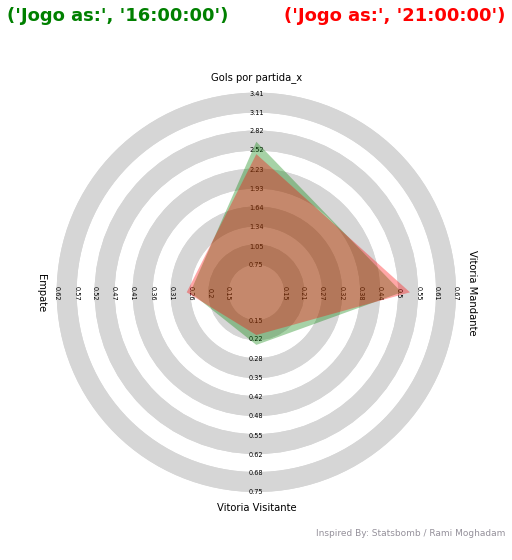

In [22]:
#titulo e legenda do grafico
from soccerplots.radar_chart import Radar

title = dict(
    title_name = ('Jogo as:', Hora1[0]),
    title_color = 'green',
    title_name_2 = ('Jogo as:', Hora2[0] ),
    title_color_2 = 'red',
    title_fontsize = 18
)

#Apelidando a funcao e em seguida criando o grafico

radar = Radar()

fig,ax = radar.plot_radar(ranges = ranges, params = params , values = values ,
radar_color = ['green','red'], alphas = [0.35, 0.35], title = title, compare = True)



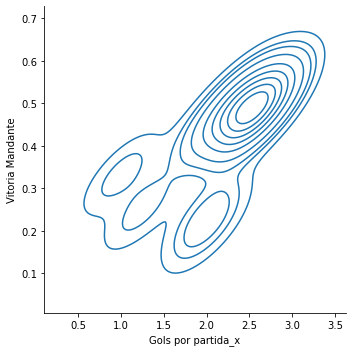

In [23]:
#Vamos entender um pouco melhor a relaçao entre Vitoria do mandante e totalidade de gols na partida.

df5.head()

sns.displot( data = df5, x = df5['Gols por partida_x'], y = df5['Vitoria Mandante'], kind = 'kde')

plt.show()

C:\Users\victo\AppData\Local\Temp\ipykernel_13252\3933193149.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gols_dist = mask1.append(mask2)


<AxesSubplot:xlabel='hora', ylabel='Total de Gols'>

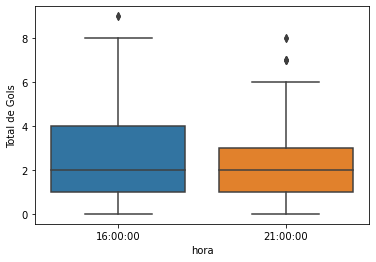

In [37]:
#Plotando o grafico boxplot para entender de forma comparativa como se da a densidade do total de gols em cada horario de jogo.

df_gols_dist = cb[['hora','Total de Gols']]
mask1 = (df_gols_dist.loc[df_gols_dist['hora'] == '16:00:00'])
mask2 = (df_gols_dist.loc[df_gols_dist['hora'] == '21:00:00'])
df_gols_dist = mask1.append(mask2)
sns.boxplot( x = df_gols_dist['hora'], y = df_gols_dist['Total de Gols'])

